In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install datasets -q

from datasets import load_dataset
import pandas as pd

# Load MedHAL directly from HuggingFace
dataset = load_dataset("GM07/medhal")

# Convert train split to Pandas DataFrame
df = pd.DataFrame(dataset["train"])

# Quick look at the dataset
print(df.shape)
print(df.columns)
print(df.head())


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

data/train-00000-of-00011.parquet:   0%|          | 0.00/252M [00:00<?, ?B/s]

data/train-00001-of-00011.parquet:   0%|          | 0.00/250M [00:00<?, ?B/s]

data/train-00002-of-00011.parquet:   0%|          | 0.00/250M [00:00<?, ?B/s]

data/train-00003-of-00011.parquet:   0%|          | 0.00/251M [00:00<?, ?B/s]

data/train-00004-of-00011.parquet:   0%|          | 0.00/250M [00:00<?, ?B/s]

data/train-00005-of-00011.parquet:   0%|          | 0.00/250M [00:00<?, ?B/s]

data/train-00006-of-00011.parquet:   0%|          | 0.00/252M [00:00<?, ?B/s]

data/train-00007-of-00011.parquet:   0%|          | 0.00/253M [00:00<?, ?B/s]

data/train-00008-of-00011.parquet:   0%|          | 0.00/251M [00:00<?, ?B/s]

data/train-00009-of-00011.parquet:   0%|          | 0.00/248M [00:00<?, ?B/s]

data/train-00010-of-00011.parquet:   0%|          | 0.00/253M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/819608 [00:00<?, ? examples/s]

(819608, 8)
Index(['id', 'context', 'statement', 'label', 'explanation', 'inner_id',
       'source', 'synthetic'],
      dtype='object')
                                     id  \
0  1dc2b3d7-d75d-47f7-a426-fd8c128ba377   
1  c67d13e6-0c4b-4699-a32b-f76ae8324387   
2  19574e41-ac83-4b58-85c2-8773a6213b2f   
3  70a3c380-e947-4b63-a0f5-89efc708fbd2   
4  47078df2-3cda-4a3b-bc47-9c387755da5d   

                                             context  \
0                                               None   
1                                               None   
2   jncl is a recessively inherited, childhood-on...   
3  A 42-year-old man with end-stage renal disease...   
4  A 48-year-old female was referred to the surgi...   

                                           statement  label  \
0  The tympanic membrane is part of the ear that ...   True   
1  The 3rd heart sound is due to the closure of t...  False   
2  moreover, these deficiencies are likely to be ...   True   
3  The patient

In [ ]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 819608 entries, 0 to 819607
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           819608 non-null  object
 1   context      580278 non-null  object
 2   statement    819608 non-null  object
 3   label        819608 non-null  bool  
 4   explanation  819407 non-null  object
 5   inner_id     819608 non-null  object
 6   source       819608 non-null  object
 7   synthetic    819608 non-null  bool  
dtypes: bool(2), object(6)
memory usage: 39.1+ MB


,0
id,0
context,239330
statement,0
label,0
explanation,201
inner_id,0
source,0
synthetic,0


In [ ]:
print(df['label'].value_counts())


label
True     417000
False    402608
Name: count, dtype: int64


In [ ]:
print(df['synthetic'].value_counts())


synthetic
False    492040
True     327568
Name: count, dtype: int64


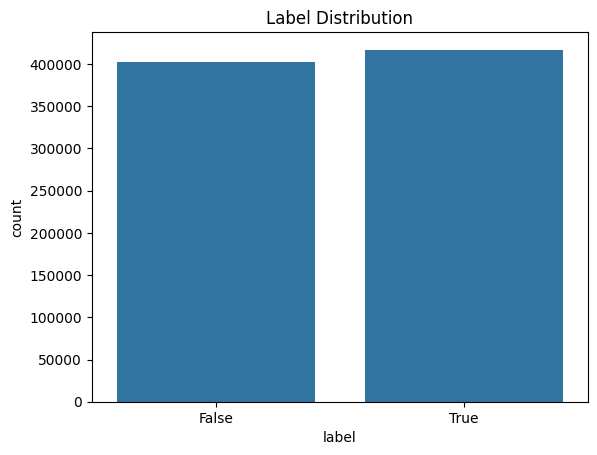

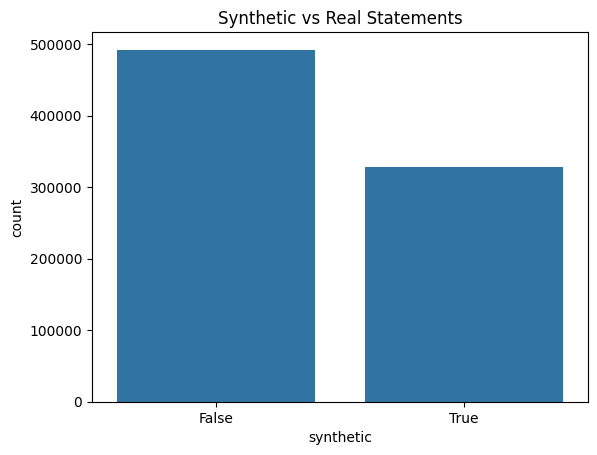

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='label', data=df)
plt.title("Label Distribution")
plt.show()

sns.countplot(x='synthetic', data=df)
plt.title("Synthetic vs Real Statements")
plt.show()


In [ ]:
import pandas as pd

# Assuming df is already defined
df.head()
print(df.head())


                                     id  \
0  1dc2b3d7-d75d-47f7-a426-fd8c128ba377   
1  c67d13e6-0c4b-4699-a32b-f76ae8324387   
2  19574e41-ac83-4b58-85c2-8773a6213b2f   
3  70a3c380-e947-4b63-a0f5-89efc708fbd2   
4  47078df2-3cda-4a3b-bc47-9c387755da5d   

                                             context  \
0                                               None   
1                                               None   
2   jncl is a recessively inherited, childhood-on...   
3  A 42-year-old man with end-stage renal disease...   
4  A 48-year-old female was referred to the surgi...   

                                           statement  label  \
0  The tympanic membrane is part of the ear that ...   True   
1  The 3rd heart sound is due to the closure of t...  False   
2  moreover, these deficiencies are likely to be ...   True   
3  The patient undergoes a Fluorodeoxyglucose pos...  False   
4  The patient undergoes skin grafting for Endome...  False   

                         